# Data analysis - <span style="color: blue">Optional extension work</span>

In [1]:
import numpy as np

There is lots more that we can do with python to analyse and present data. The optional sections of the notebook below will introduce you to three more important aspects of data analysis:
* Reading more complex files,
* Hypothesis testing,
* Creating more complex plots.

### Opening a file

The file we are going to work with first is `Data/test_data.txt`. Take a look at the contents by opening it up in a text editor such as Notepad - it just contains a small amount of toy data. The first thing we need to do is tell python where the file is and associate it with a file object:

In [2]:
myFile = open('Data/test_data.txt', 'r')

The function <code>open()</code> returns a file object, which we here associate with the variable <code>myFile</code>. You can think of this variable as a label that we can use to access the file from now on. The <code>'r'</code> specifies that we are opening the file for the purposes of reading its contents rather than writing to it. We will look at writing files later. Notice that we did not need to import any new modules in order to open the file for reading: the function `open()` is part of core python.

### Reading the data into an array

Now we need to read in the data from the file. We can read a single line from the file:

In [3]:
myFile.readline()

'Grain Height Width\n'

`readline()` is a *method* of a *file* object. our variable `myFile` contains a file object, so when we apply the `readline()` method to it it returns a single line of the file. The structure here is:

    <object>.<method_to_do_something_to_object>

Notice the addition of a newline character '\n' at the end of the line. Each time we read a line, Python moves through the file, so if we repeat the command:

In [4]:
myFile.readline()

'1 3.43 3.56\n'

then we get the next line. To move back to the start of the file we can use:

In [5]:
myFile.seek(0)

0

Now we can try reading the whole file at once:

In [6]:
myFile.readlines()

['Grain Height Width\n', '1 3.43 3.56\n', '2 5.32 4.54\n', '3 4.32 1.94']

In [7]:
myFile.seek(0)
myData = myFile.readlines()

Now the data is contained in the `myData` variable. We can then, for example, print out the second line (remember that Python indexes its arrays, lists, etc. from zero!)

Notice that the `readlines()` method of a file object returns a python *list* in which each line of the file is a member of the list (we could assign this list to a variable, if we wanted):

In [8]:
print(myData[1])

1 3.43 3.56



This element of the `myData` list is a *string*. We can thus split this line of text quite easily using the `split()` method of the string object:

In [9]:
myData[1].split()

['1', '3.43', '3.56']

This returns another list object in which each member is one of the space-separated values in the line from our file. Note that <code>split()</code> can be given several optional parameters, one of which will split the line based on any delimiting character(s), such as a comma, that you specify. The default delimiter is one or more spaces. Use your favourite search engine to find out a bit more about the `split()` method and the various options that you can use.

Now let's do something a bit more useful and flexible: we'll read the contents of the file into a numpy array. We know the size of the array and the type of data it contains (floating point numbers) and we don't want to include the first line (the header) or first column (sample labels) in the array, so we can begin by defining an empty array:

In [10]:
import numpy as np
myDataArray = np.zeros([3,2], dtype=float) # Create a 3x2 array full of zeros (of floating point type)

Now, here I have explicitly told Python that my array will contain floating point numbers by specifying `dtype=float`. I don't need to to this, but it can save trouble and make the code more readable.

Next I need to iterate through the file and read each line into the array:

In [11]:
myFile.seek(0) # Go back to the beginning of the file!
lineIndex = 0  # Keep track of which line we are reading
myFile.readline() # Read the first (header) line and do nothing with it
for line in myFile:
    theseData = line.split() # split the line and store the result in a list
    myDataArray[lineIndex,0] = float(theseData[1])
    myDataArray[lineIndex,1] = float(theseData[2])
    lineIndex = lineIndex + 1 # Increment the line counter so that we write to the next row of the array
print(myDataArray)
    

[[ 3.43  3.56]
 [ 5.32  4.54]
 [ 4.32  1.94]]


Notice how flexible the `for` loop is in Python: it "knows" about the concept of "lines" in "files". 

Now let's close the file, to avoid any problems with file conflicts:

In [12]:
myFile.close()

Always close files as soon as you are done with them.

## Hypothesis testing

Let's load in the data for the pore sizes in a metal foam from the file `pores_unstrained.txt` that we worked with previously.

In [13]:
import numpy as np
sampleA = np.loadtxt('Data/pores_unstrained.txt', delimiter=',', usecols=(0,))
sampleB = np.loadtxt('Data/pores_unstrained.txt', delimiter=',', usecols=(1,))

The two samples of pore sizes A and B have quite similar means but moderately large standard deviations, so it would be reasonable to conclude that these two samples come from similar populations (which is to say in our context that they come from equivalent materials). We can formally test this conclusion by using a *t-test* to test if we can reject our *null hypothesis* that "the two samples are from populations that have equivalent average pore sizes". We do this as follows:

In [14]:
from scipy import stats
testResults = stats.ttest_ind(sampleA,sampleB)
print('The p-value is ' + str(testResults[1]))

The p-value is 0.0390241855983


This p-value is less than 5%, which suggests that we can reject our null hypothesis at the 95% level and conclude that the two materials that we have sampled are likely to have different pore size distributions.

### <span style="color: red"> Optional task:</span> Carry out a hypothesis test on *paired* data

This is a particularly challenging task, so leave it until last and come back to it if you are interested.

The file `pores_Strained.txt` in the `Data` folder contains measurements of the sizes of ten pores in a single sample of metal foam, before and after a strain is applied. 

<figure>
<img src="Figures/pores_strained.png" width='200'>
<figcaption></figcaption>
</figure>

Note that in each line of the file the two columns contain the size of *the same pore* before and after straining. Hence this is what is known as *paired data*. Your task is to do the following:
* Calculate the basic statistics for the sample of pores before and after straining.
* Use an appropriate statistical test to determine if the straining of the sample has resulted in an increase in the mean pore size at the 95% confidence level.

### <span style="color: blue"> Solution:</span>

## A more complex plot - Texture analysis

In this section we will introduce you to a different kind of plot and use it to analyse some real experimental data. We'll also take a look at some of the ways that you can format plots in python and how to write your plots to a file (perhaps for use in a project report or dissertation).

### A (very) brief introduction to pole figures 

By now, you should have been introduced to the idea of material *microstructure* and know that most of the metals that we use are *polycrystalline*. This means that they are made up of multiple *grains* of crystal in which the arrangement of atoms has different orientations.

<figure>
<img src="Figures/Polycrystal.jpg" width='200'>
<figcaption></figcaption>
</figure>

The way that the orientations of these grains are distributed is known as the *texture* of the material. A *random texture* means that the distribution of orientation of the crystal lattice in the grains is random. If all of the grains have their crystal lattices oriented in (or close to) a subset of directions, then the material is said to have a *strong texture*.

Here we will look at some data for the orientation of the grains in a sample of a zirconium alloy used in the fuel rods for fission nuclear reactors. This alloy is processed to give it a strong texture. The figure below shows an  EBSD (electron back-scatter diffraction) map of the grain structure of a sample of Zr alloy:

<figure>
<img src="Figures/ebsd_map.png" width='300'>
<figcaption></figcaption>
</figure>

Here we can see the grains of the metal, coloured according to the orientation of the $[0001]$ crystallographic direction relative to the plane of the image (note that Zr has the hcp structure at normal temperature and pressure). One way that this sort of information about texture can be represented *quantitatively* is with a *pole figure* like the one below:

<figure>
<img src="Figures/pole_figure.png" width='600'>
<figcaption></figcaption>
</figure>

In this figure we are showing contour plots of the relative likelihood of finding a given crystallographic plane ($(10\overline{1}0)$, $(0001)$ and $(10\overline{1}2)$ as indicated in the labels of the subplots) orientated in a certain way relative to the sample ('RD' and 'ND' are the rolling and normal directions in the sample - actually the 'ND' is mislabelled here: it should be 'TD' for transverse direction). You'll get used to reading these types of figures over the next few years, but for now focus on the centre plot, for the $(0001)$ pole.



### Reading in the data

We thought it might be instructive to work with some raw data taken straight from one of the lab-based xray instruments here at Manchester. This means the file structure is complicated and includes headers containing lots of information. The structure is shown schematically below:

<figure>
<img src="Figures/FileFormat.jpg" width='500'>
<figcaption></figcaption>
</figure>

We've provided the python code necessary to read in the file and load it into several numpy arrays. Have a careful look through the code and try to understand what it is doing (we've added some comments to help you).

In [16]:
import numpy as np
myFile = open('Data/Z4RX_3PEAKS.uxd', 'r')
fileHeadSize = 31  # The number of lines in the main file header
blockHeadSize = 30 # The number of lines in the header for each block section
nPoles = 3         # The file contains data for three poles corresponding to the three subfigures above
nTheta = 18        # There are 18 blocks. One for each different polar angle (0 to 85 degrees at 5 degree intervals)
nPhi = 72          # There are 72 entries for different azimuthal angles at each polar angle (0 to 355 deg at 5 deg intervals)
poleData = np.zeros((nPoles,nTheta,nPhi+1), dtype=float)
thetaAngle = np.zeros(nTheta, dtype=float)
phiAngle = np.zeros(nPhi+1, dtype=float)
for i in range (fileHeadSize):
    myFile.readline()
for i in range(nPoles):
    for j in range(nTheta):
        for l in range(blockHeadSize):
                thisLine = myFile.readline()                
                if (i==0 and l==9):
                    thetaAngle[j] = float(thisLine.split()[2])*np.pi/180.0
        for k in range(nPhi):
            thisData = myFile.readline().split()
            if (i==0 and j==0):
                phiAngle[k] = float(thisData[0])*np.pi/180.0
            poleData[i,j,k] = float(thisData[1])
    for j in range(nTheta):
        poleData[i,j,nPhi] = poleData[i,j,0]
phiAngle[nPhi] = 360.0*np.pi/180.0
        
myFile.close()

            

### A basic plot
Let's begin by simply plotting out the data from the file in a polar plot - we won't bother with any formatting at this stage:

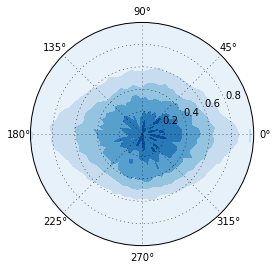

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.subplot(111, polar=True)
cax = ax.contourf(phiAngle,np.sin(thetaAngle),poleData[1,:,:]/1625.0, cmap=plt.cm.get_cmap('Blues'), vmax=5.0)
plt.show()

### Formatting a figure 
Now let's try something a bit more fancy - we'll format up the plot in a way suitable for publication. Have a look at the code below and use the Python documentation and internet search results to understand what each line is doing;

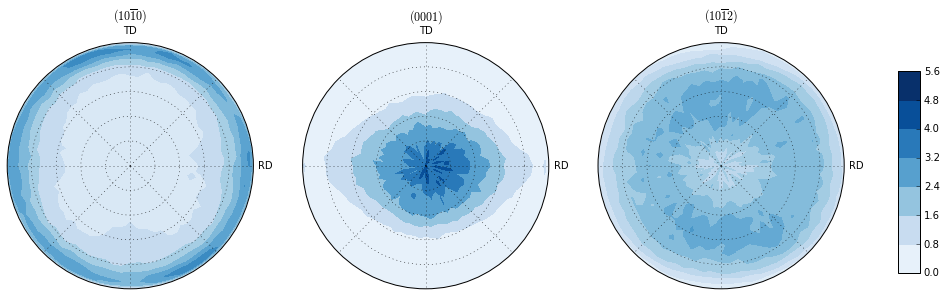

In [19]:
import matplotlib.pyplot as plt
import pylab

fig = plt.figure(figsize=(15,7))
ax1 = plt.subplot(131, polar=True)
cax1 = ax1.contourf(phiAngle,np.sin(thetaAngle),poleData[0,:,:]/500.0, cmap=plt.cm.get_cmap('Blues'), vmax=5.0)
ax1.set_xticklabels(['RD', '', 'TD', '', '', '', '', ''])
ax1.set_yticklabels([])
ax1.set_title("$(10\overline{1}0)$", va='bottom')
ax2 = plt.subplot(132, polar=True)
cax2 = ax2.contourf(phiAngle,np.sin(thetaAngle),poleData[1,:,:]/1625.0, cmap=plt.cm.get_cmap('Blues'), vmax=5.0)
ax2.set_xticklabels(['RD', '', 'TD', '', '', '', '', ''])
ax2.set_yticklabels([])
ax2.set_title("$(0001)$", va='bottom')
ax3 = plt.subplot(133, polar=True)
cax3 = ax3.contourf(phiAngle,np.sin(thetaAngle),poleData[2,:,:]/450.0, cmap=plt.cm.get_cmap('Blues'), vmax=5.0)
ax3.set_xticklabels(['RD', '', 'TD', '', '', '', '', ''])
ax3.set_yticklabels([])
ax3.set_title("$(10\overline{1}2)$", va='bottom')

cbar_ax = fig.add_axes([0.95, 0.3, 0.02, 0.4])
fig.colorbar(cax, cax=cbar_ax)
ax.grid(True)

pylab.savefig('Output/PoleFigure.pdf', bbox_inches='tight')
plt.show()



Note that the last two lines use functionality from the pylab module (which we need to import, of course) to save the figure in a file. Here we have chosen pdf format as this is ideal for inclusion in written work. You can also output e.g. png or jpg formats for use on webpages. Find the file in the Outputs directory and open it with a pdf viewer to check that everything has worked as expected.

### <span style="color: red"> Optional task:</span> An alternative plot

Produce a plot of just the right-most pole figure ($(10\bar{1}2)$ pole), with a colour key and using a colour map of the colours of the visible spectrum. Save this figure as a png graphic.

### <span style="color: blue"> Solution:</span>